In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import re
from hanspell import spell_checker

In [2]:
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
data=pd.read_csv("not_merry_final.csv",encoding="cp949")

In [4]:
data["mate_conts"].isnull().sum()

11796

In [5]:
data.drop(data.loc[data["mate_conts"].isnull()].index, inplace=True)

In [6]:
data["family_conts"].isnull().sum()

1505

In [7]:
data.drop(data.loc[data["family_conts"].isnull()].index, inplace=True)

In [8]:
data['label']=0

In [9]:
data.reset_index(inplace=True,drop=True)

In [20]:
data["family_conts"]=data["family_conts"].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 0-9 ? !]"," ")

In [11]:
data_m=pd.read_csv("../data/thanks_yeobaya_2.csv",encoding="cp949")

In [12]:
data_m.drop(data_m.loc[data_m["mate_conts"].isnull()].index, inplace=True)

In [13]:
data_m.drop(data_m.loc[data_m["family_conts"].isnull()].index, inplace=True)

In [14]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 11090
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   auto_no                10730 non-null  int64  
 1   reg_slct               10730 non-null  object 
 2   reg_mem_no             10730 non-null  int64  
 3   reg_name               0 non-null      float64
 4   reg_title              10730 non-null  object 
 5   reg_sex                10729 non-null  object 
 6   reg_age                10730 non-null  int64  
 7   reg_nick               10730 non-null  object 
 8   reg_photo              7198 non-null   object 
 9   reg_photo_cnt          10730 non-null  int64  
 10  reg_loc                10729 non-null  object 
 11  reg_job_detail         10727 non-null  object 
 12  reg_join_date          10730 non-null  object 
 13  reg_job                10730 non-null  float64
 14  reg_point              10730 non-null  int64  
 15  re

In [15]:
data_m['label']=1

In [21]:
data_m["family_conts"]=data_m["family_conts"].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 0-9 ? !]"," ")

In [22]:
train1=data.loc[:10729,['family_conts','label']]

In [23]:
train1

,family_conts,label
0,부모님 두분 아직은 건강하시고 형제로는 남동생 하나있답니다,0
1,삼남매이며 형제간에우애하고 화목한가정에서 자랐습니다 앞으로도 좋은가정을 이뤄나아가고...,0
2,부모님은 몇해전 귀농하셔서 시골에서 생활중입니다 부모님 형 모드 건강하며,0
3,그냥 화목하게 지내고 있는중입니다 별다른거는 없네요 고부 갈등은 없을껍니다,0
4,나혼자입니다 언제부터인지는 모르지만 혼자입니다 만날수있다는거죠,0
...,...,...
10725,가족들은 다 결혼하고 저혼자 남아 있네요 누나들하고 사이좋게 지내고 있어요,0
10726,전 23살된 아들 하나있읍니다 현재 직업군인으로 있읍니다,0
10727,음 안녕하세여 3남 3녀에 막내이구여 두분다 어릴적에 작고하셨네요,0
10728,원만한 가족관계로서 서로의 의사를 존중하고 서로의 집안일들을 의논하며 처리...,0


In [24]:
train2=data_m.loc[:,['family_conts','label']]

In [25]:
train2

,family_conts,label
0,자녀는 성인이며 배우자와 함께 살고 가끔 톡이나 통화함,1
1,안녕하세요 부모님은 다계시고 건강히 지내고 있습니다 잘부탁드릴께요,1
2,누나 두분 그리고 제 아들 딸 19살 16살 사정상 같이 살지는 않고요,1
3,딸아이4살때부터 쭈욱 둘이였습니다 어느덧 딸아이가 시집갈나이가 되어서 지금은 늘...,1
4,위로딸 아들 남매 를두었습니다 딸은서울에서 공직생활하고있으며 아들은 대구에있...,1
...,...,...
11043,제목숨보다도 소중한 아버지십니다 제고향도 서울이고 아버지도 혼자계시니 멀리있는분은...,1
11085,어떠한 상황이 있어도 항상 저를 응원하고 격려하는 의리 넘치는 멋진 사람들입니다 ...,1
11088,여동생은 중 선생님이구여 매제는 법무사랍니다 막내남동생은반도체기계 엔지니어로 늘 바...,1
11089,1남 1녀를 두고 있고요 둘 다 미국 주류사회에서 인정받고 있어요,1


In [26]:
train_data=pd.concat([train1,train2],axis=0)

In [27]:
train_data

,family_conts,label
0,부모님 두분 아직은 건강하시고 형제로는 남동생 하나있답니다,0
1,삼남매이며 형제간에우애하고 화목한가정에서 자랐습니다 앞으로도 좋은가정을 이뤄나아가고...,0
2,부모님은 몇해전 귀농하셔서 시골에서 생활중입니다 부모님 형 모드 건강하며,0
3,그냥 화목하게 지내고 있는중입니다 별다른거는 없네요 고부 갈등은 없을껍니다,0
4,나혼자입니다 언제부터인지는 모르지만 혼자입니다 만날수있다는거죠,0
...,...,...
11043,제목숨보다도 소중한 아버지십니다 제고향도 서울이고 아버지도 혼자계시니 멀리있는분은...,1
11085,어떠한 상황이 있어도 항상 저를 응원하고 격려하는 의리 넘치는 멋진 사람들입니다 ...,1
11088,여동생은 중 선생님이구여 매제는 법무사랍니다 막내남동생은반도체기계 엔지니어로 늘 바...,1
11089,1남 1녀를 두고 있고요 둘 다 미국 주류사회에서 인정받고 있어요,1


In [28]:
train_data.reset_index(drop=True,inplace=True)

In [29]:
train_data.to_csv("train_data_family.csv")

In [30]:
X=train_data["family_conts"]
y=train_data['label']

In [31]:
y=pd.get_dummies(y)

In [32]:
y

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
21455,0,1
21456,0,1
21457,0,1
21458,0,1


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [34]:
X_train

16077      이쁘고  똑똑한  딸아이  하나랑  살고 있어요 평범하고  이쁘게  알콩달콩 살아요 
9683     어머니와 누나 저 남동생 2남1녀입니다  모두 둥굴둥굴 동네에서는 인성이좋은집으로 ...
6521     새아버지 어머니 누나 저 이렇게4인 가족입니다  어릴때 아버지가 돌아가셔서 어머니가...
16074                부모님은 고향에사시고 저는혼자지내고 딸은얼마전에 독립해서 살고있어요
14920          딸 둘 중3 중2 같이 살고있구요  엄마 오빠 각각 따로  열심히 살고있습니다
                               ...                        
6400     저는 1남 1녀중 막내로 가족 모두 건강하고 행복하게 잘살고있습니다   아버지는 공...
15288        아들은건설회사다니고 딸은커피숍하고잇어요 애들은 자기할일하고있으니 자식걱정은없어요 
11513                     고향에 아버지만 계시고  3남2녀중 넷째입니다  감사합니다
1688             어머님 남동생  그리고 저어머님 며느리언제쯤 볼 수 있을까 기다리중 입니다
5994           가족들 모두  건강하고  잘 지내고 있습니다  저는  1남1녀 둘째 이고요  
Name: family_conts, Length: 16095, dtype: object

In [35]:
X_test

15450    대학생 3학년 딸과 부모님 모두 건강 합니다  서로 아끼고 사랑하는 믿음안에  있는...
2400         대한민국의 평범한 가정입니다   누나들은 모두 시집갔고 이렇게 저만 남았네요   
20192                  아버지 어머니 저와 여동생 있습니다   여동생은 시집갔습니다  
15896                부모님은 다돌아 가시고  자녀는 직장인 딸1 대학생인 아들1 있어요
10356                     건강하신 부모님과 장가간 남동생에 최근 조카까지 생겼답니다
                               ...                        
18842       아버지와어머니남동생 부모님은강원도삼척계시구 두분다너무 정적인분들이셔서너무좋아요   
14288             가족4명   있고  택배  돌봄     등등  엄마   아빠  남동생 나
16005    2남3녀중 막내로 태어나서 가족듷 의 많은 사랑읗 받고 자림  내가족은 딸 하나 유학중!
19133    신세대이시며 세련됐고 재밌는 부모님 외 6자매 각자 건강관리 잘하며 자주연락하고삽니다  
17207                      저는 부모는 없어요  딸2인데 모두 출가  저혼자 살아요
Name: family_conts, Length: 5365, dtype: object

In [36]:
import konlpy
from konlpy.tag import Okt
okt=Okt()

In [37]:
X_train_txt=[]
for sentence in X_train:
    temp_X=[]
    temp_X=okt.morphs(sentence)#토큰화
    X_train_txt.append(temp_X)

In [38]:
X_test_txt=[]
for sentence in X_test:
    temp_X=[]
    temp_X=okt.morphs(sentence)#토큰화
    X_test_txt.append(temp_X)

In [39]:
print(X_train_txt[:3])

[['이쁘고', '똑똑한', '딸아이', '하나', '랑', '살', '고', '있어요', '평범하고', '이쁘게', '알콩달콩', '살아요'], ['어머니', '와', '누나', '저', '남동생', '2', '남', '1', '녀', '입니다', '모두', '둥굴둥굴', '동네', '에서는', '인성', '이', '좋은', '집', '으로', '통', '하구요', '좋아요', 'ㅎ'], ['새아버지', '어머니', '누나', '저', '이렇게', '4', '인', '가족', '입니다', '어릴', '때', '아버지', '가', '돌아가셔서', '어머니', '가', '고생', '을', '많이', '하셔서', '어머니', '께', '잘', '할', '겁니다']]


In [40]:
print(X_test_txt[:3])

[['대학생', '3', '학년', '딸', '과', '부모님', '모두', '건강', '합니다', '서로', '아끼고', '사랑', '하는', '믿음', '안', '에', '있는', '복된', '가정', '입니다'], ['대한민국', '의', '평범한', '가정', '입니다', '누나', '들', '은', '모두', '시집갔고', '이렇게', '저만', '남았네요'], ['아버지', '어머니', '저', '와', '여동생', '있습니다', '여동생', '은', '시집갔습니다']]


In [41]:
from keras_preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train_txt)

In [42]:
word_df = pd.DataFrame([tokenizer.word_counts.keys(),
                       tokenizer.word_counts.values()])

In [43]:
word_df = word_df.T

In [44]:
word_df.columns=['word','count']

In [45]:
word_df.sort_values(by='count', ascending=False)

,word,count
54,은,10351
58,는,6572
6,고,5919
56,에,5411
53,부모님,5049
...,...,...
10822,딸하나있습니다,1
10823,광저우,1
10826,좋아할거예요,1
10828,합치,1


In [47]:
max_words=19300
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_txt)
X_train=tokenizer.texts_to_sequences(X_train_txt)
X_test=tokenizer.texts_to_sequences(X_test_txt)

In [48]:
print(X_train[:3])

[[1511, 2838, 237, 81, 104, 10, 3, 49, 393, 1390, 342, 130], [15, 41, 33, 13, 42, 31, 32, 30, 39, 8, 27, 8510, 1805, 1649, 895, 7, 70, 118, 52, 1269, 642, 436, 203], [2839, 15, 33, 13, 109, 79, 86, 11, 8, 534, 170, 23, 25, 683, 15, 25, 2418, 12, 169, 308, 15, 457, 24, 165, 649]]


In [49]:
print(X_test[:2])

[[233, 53, 195, 26, 20, 5, 27, 404, 57, 76, 1388, 94, 97, 974, 128, 4, 129, 37, 8], [1492, 47, 96, 37, 8, 33, 6, 1, 27, 1237, 109, 108, 625]]


In [50]:
y_train

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]], dtype=uint8)

In [51]:
y_test

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [52]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [53]:
y_train

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]], dtype=uint8)

In [54]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from keras_preprocessing.sequence import pad_sequences

In [55]:
x_train_len = [len(x) for x in X_train]

(array([3.436e+03, 9.760e+03, 1.913e+03, 5.040e+02, 1.850e+02, 1.060e+02,
        9.100e+01, 7.100e+01, 2.500e+01, 4.000e+00]),
 array([  0. ,  13.9,  27.8,  41.7,  55.6,  69.5,  83.4,  97.3, 111.2,
        125.1, 139. ]),
 <BarContainer object of 10 artists>)

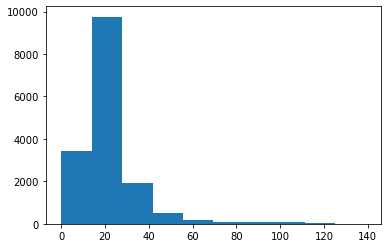

In [56]:
plt.hist(x_train_len)

In [57]:
max_len=130
X_train_pad=pad_sequences(X_train,maxlen=max_len)
X_test_pad=pad_sequences(X_test,maxlen=max_len)

In [58]:
X_train_pad

array([[   0,    0,    0, ..., 1390,  342,  130],
       [   0,    0,    0, ...,  642,  436,  203],
       [   0,    0,    0, ...,   24,  165,  649],
       ...,
       [   0,    0,    0, ...,  973,    8,  664],
       [   0,    0,    0, ..., 4619,   21,    8],
       [   0,    0,    0, ...,  111,    7,  225]])

In [59]:
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers import Dropout

In [60]:
filename = '../model/fam_text_model-{epoch:02d}-{val_accuracy:.4f}.hdf5'

In [61]:
mc = ModelCheckpoint(filename,
                     monitor='val_accuracy',
                     verbose=1,
                     save_best_only=True)
es = EarlyStopping(monitor="val_accuracy",patience=100)

In [62]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [63]:
model=Sequential()
model.add(Embedding(max_words,100))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['accuracy'])
history=model.fit(X_train_pad,y_train,epochs=1000,batch_size=10,
                  validation_data=(X_test_pad,y_test), callbacks=[mc,es])

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1610/1610 [==============================] - ETA: 0s - loss: 0.6342 - accuracy: 0.6482WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000020DB77BCBF8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY

Epoch 23/1000
1610/1610 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9925
Epoch 00023: val_accuracy did not improve from 0.68388
1610/1610 [==============================] - 73s 46ms/step - loss: 0.0214 - accuracy: 0.9925 - val_loss: 2.6362 - val_accuracy: 0.6075
Epoch 24/1000
1610/1610 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9927
Epoch 00024: val_accuracy did not improve from 0.68388
1610/1610 [==============================] - 72s 45ms/step - loss: 0.0200 - accuracy: 0.9927 - val_loss: 2.8397 - val_accuracy: 0.6209
Epoch 25/1000
1610/1610 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9943
Epoch 00025: val_accuracy did not improve from 0.68388
1610/1610 [==============================] - 71s 44ms/step - loss: 0.0164 - accuracy: 0.9943 - val_loss: 2.6935 - val_accuracy: 0.5935
Epoch 26/1000
1610/1610 [==============================] - ETA: 0s - loss: 0.0159 - accuracy: 0.9948
Epoch 00026: val_accuracy 

1610/1610 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9966
Epoch 00051: val_accuracy did not improve from 0.68388
1610/1610 [==============================] - 70s 43ms/step - loss: 0.0118 - accuracy: 0.9966 - val_loss: 2.7363 - val_accuracy: 0.6076
Epoch 52/1000
1609/1610 [============================>.] - ETA: 0s - loss: 0.0110 - accuracy: 0.9970
Epoch 00052: val_accuracy did not improve from 0.68388
1610/1610 [==============================] - 70s 43ms/step - loss: 0.0110 - accuracy: 0.9970 - val_loss: 2.8211 - val_accuracy: 0.6121
Epoch 53/1000
1610/1610 [==============================] - ETA: 0s - loss: 0.0053 - accuracy: 0.9981
Epoch 00053: val_accuracy did not improve from 0.68388
1610/1610 [==============================] - 70s 44ms/step - loss: 0.0053 - accuracy: 0.9981 - val_loss: 3.2985 - val_accuracy: 0.6192
Epoch 54/1000
1610/1610 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 0.9983
Epoch 00054: val_accuracy did not improv

1610/1610 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9982
Epoch 00079: val_accuracy did not improve from 0.68388
1610/1610 [==============================] - 71s 44ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 3.0543 - val_accuracy: 0.6099
Epoch 80/1000
1610/1610 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9983
Epoch 00080: val_accuracy did not improve from 0.68388
1610/1610 [==============================] - 71s 44ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 2.8608 - val_accuracy: 0.6062
Epoch 81/1000
1610/1610 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 0.9981
Epoch 00081: val_accuracy did not improve from 0.68388
1610/1610 [==============================] - 72s 45ms/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 2.8526 - val_accuracy: 0.6076
Epoch 82/1000
1610/1610 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 0.9977
Epoch 00082: val_accuracy did not improv

In [64]:
def predict(sent):
    sentence_before=[]
    sentence_before.append(sent)
    sent_txt=[]
    for sentence in sentence_before:
        temp_X=[]
        temp_X=okt.morphs(sentence)
        sent_txt.append(temp_X)
    
    
    
    max_words=19300
    tokenizer=Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(sent_txt)
    f_data=tokenizer.texts_to_sequences(sent_txt)
    max_len=130
    data_pad=pad_sequences(f_data,maxlen=max_len)
    
    import math
    
    p=model.predict(data_pad)[0][1]
    
    return p

In [67]:
Q="부모님 두분과 같이 생활 하고 있습니다"

In [68]:
predict(Q)

0.053284395